# Microsoft Studios Movie Project


# 1. Introduction

## 1.1 Overview

Films are a major part of popular culture and a huge source of entertainment for many people. The market is projected to reach USD 409.02 billion by 2026 in terms of revenue. Therefore, it is wise to invest in this market. I will use data from various websites that contain information about the film industry.

## 1.2 Objectives

1. Business Understanding<br>
2. Data Understanding <br>
3. Data Preparation
4. Data Analysis
5. Conclusion

# 2. Business Understanding

The tech giant Microsoft has decided to venture into creating original video content and wants to establish a movie studio. My goal is to use exploratory data analysis to produce insights for Microsoft as they enter the film industry. I will be looking for answers to the following questions:

1.What are the most profitable genres, franchises, and stars in each market and how do they differ across regions?

2.How do critical and audience ratings and reviews affect the box office performance of different films and how can they be used to predict demand and optimize marketing strategies?

3.What are the current and future challenges and opportunities in the film industry and how can Microsoft leverage its strengths and resources to create original video content that meets the need of the users?


# 3. Data Understanding

The datasets provided for this analysis were collected from different movie review aggregation sites and contain information on the various movie genres and their popularity among critics and viewers.  
The datasets include:
1. [IMDB](https://www.imdb.com/) 
2. [Box Office Mojo](https://www.boxofficemojo.com/) 
3. [Rotten Tomatoes](https://www.rottentomatoes.com/)


## Steps
1. Load the data with pandas and explore the dataframes.
2. Clean the data by dealing with:
    - missing values
    - duplicate rows
    - invalid data
    - outliers
3. Perform exploratory analysis in order to answer the business questions.
4. Conclusion.
5. Recommendations.

# 4. Loading Libraries and Datasets

In [75]:
# importing the packages I will be using for this project
import numpy as np
import sqlite3
import pandas as pd
import zipfile
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
#loading the datasets
#first extract the im.db file and create a database connection
zf = zipfile.ZipFile('zippedData/im.db.zip')
zf.extract('im.db')
conn = sqlite3.connect('im.db')
#Loading other datasets
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter = "\t",encoding='latin-1')
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter = '\t')
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_budgets1 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


# 3.2 Previewing the Datasets

#### a. Bom_movies

In [77]:
#previewing the top
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [78]:
#previewing the bottom 
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [79]:
#determining the number of rows and columns
bom_movies.shape

(3387, 5)

In [80]:
#Checking the datatypes
bom_movies.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [81]:
#previewing bom_movies information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [82]:
#previewing the summary statistics of bom_movies
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Observations:

1.The mean domestic gross is about 28.7 million dollars, with a large standard deviation of about 67 million dollars. The minimum domestic gross is 100 dollars and the maximum is about 936.7 million dollars.

2.The DataFrame has 3387 rows and 5 columns.

3.The info method shows that there are some missing values in the studio, domestic_gross, and foreign_gross columns

4.The foreign_gross column is of the object data type, which suggests that it may contain non-numeric values.

#### b. Rt_movies

In [83]:
#previewing the top of rt_movies
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [84]:
#previewing the bottom of rt_movies
rt_movies.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [85]:
#determining the number of rows and columns
rt_movies.shape

(1560, 12)

In [86]:
#previewing information on rt_movies
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Observations:

1. The currency, box_office, and studio columns have the most missing values, with only 340, 340, and 494 non-null entries respectively.
2. Values in genre column is separated by a vertical bar ( | ).
3. Runtime column is in string format I will drop the word "minutes" in the runtime column because it is in string format for easier analysis.

#### c. Rt_reviews

In [87]:
#previewing the top of rt_reviews
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [88]:
#previewing the bottom of rt_reviews
rt_reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [89]:
#determining the number of rows and columns
rt_reviews.shape

(54432, 8)

In [90]:
#previewing information on rt_reviews
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [91]:
#previewing the summary statistics
rt_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


Observations:

1. The reviews seem to be sentences so they will not be of much use.
2. rt_movies and rt_reviews can be merged since they contain similar information.
3. The columns review,rating and critic appear have missing values  

#### d. Movie_budgets1

In [92]:
#previewing the top movie_budgets

movie_budgets1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [93]:
#determining the number of rows and columns
movie_budgets1.shape

(5782, 6)

In [94]:
#previewing information on movie_budgets
movie_budgets1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Observations:
1. The data has 2 types : integer and object.
2. The columns includes id, rerlease_date, production_budget, domestic_gross and worldwide_gross

## I will join the movie_budgets table with the rt_movies

In [95]:
movie_budgets = pd.merge(movie_budgets1, rt_movies, on='id')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,1,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
4,1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,"$1,000,000",$0,"$552,614",Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN
4678,100,"Oct 11, 2013",Escape from Tomorrow,"$650,000","$171,962","$171,962",Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN
4679,100,"Jul 11, 2014",As It Is in Heaven,"$450,000","$13,486","$13,486",Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN
4680,100,"Dec 31, 2014",Horse Camp,"$250,000",$0,$0,Four old college friends in their forties come...,NR,Comedy|Drama,Willem van de Sande Bakhuyzen,NaN,NaN,NaN,NaN,NaN,108 minutes,NaN


#### e. IMBD Movies

In [96]:
#viewing the list of tables in the imdb database
imdb_tables = pd.read_sql("""
SELECT name TableNames
FROM sqlite_master
WHERE type = 'table'
;
""",conn)
imdb_tables

,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [97]:
#previewing the movie_basics table
imovie_basics = pd.read_sql_query('SELECT * FROM movie_basics', conn)
imovie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [98]:
#previewing the persons table
ipersons = pd.read_sql_query('SELECT * FROM persons', conn)
ipersons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [99]:
#previewing the movie_ratings table
imovie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings', conn)
imovie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [100]:
#previewing the directors table
idirectors = pd.read_sql_query('SELECT * FROM directors', conn)
idirectors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


### I will join movie_ratings, directors and persons tables to movie_basics table since they all share movie_id and person_id.

In [101]:
imdb = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
USING (movie_id)
JOIN directors d
USING (movie_id)
JOIN persons p
USING (person_id)
;
""",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [102]:
#closing the connection to the database
conn.close()

In [103]:
#previewing the top of the imdb dataframe
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [104]:
#previewing the bottom of the imdb dataframe
imdb.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181386,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,Joost van der Wiel,NaN,NaN,"director,cinematographer,writer"


In [105]:
#determining the number of rows and columns
imdb.shape

(181387, 13)

In [106]:
#checking the information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   primary_title       181387 non-null  object 
 2   original_title      181387 non-null  object 
 3   start_year          181387 non-null  int64  
 4   runtime_minutes     163584 non-null  float64
 5   genres              180047 non-null  object 
 6   averagerating       181387 non-null  float64
 7   numvotes            181387 non-null  int64  
 8   person_id           181387 non-null  object 
 9   primary_name        181387 non-null  object 
 10  birth_year          54805 non-null   float64
 11  death_year          1342 non-null    float64
 12  primary_profession  181262 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 18.0+ MB


In [107]:
#previewing the summary statistics of imdb 
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes,birth_year,death_year
count,181387.000000,163584.000000,181387.000000,1.813870e+05,54805.000000,1342.000000
mean,2014.309802,97.789484,6.217683,4.955524e+03,1969.097856,2014.908346
std,2.536111,194.434689,1.388026,3.760931e+04,12.499740,4.866581
min,2010.000000,3.000000,1.000000,5.000000e+00,1870.000000,1944.000000
25%,2012.000000,84.000000,5.400000,1.900000e+01,1962.000000,2014.000000
50%,2014.000000,94.000000,6.300000,6.600000e+01,1971.000000,2016.000000
75%,2016.000000,107.000000,7.200000,3.110000e+02,1978.000000,2018.000000
max,2019.000000,51420.000000,10.000000,1.841066e+06,2004.000000,2019.000000


Observations:
1. The genres are separated by commas.
2. There are columns with missing data: runtime_minutes, genres, birth_year, death_year and primary_profession.
3. The longest movie is 51,420 minutes and the lowest 3 minutes long and the standard deviation is at 194.4 from runtime_minutes.
4. The highest number of votes cast was 1,841,066 and the lowest 5 only.

# 5. Data Cleaning

This section prepares the data for exploratory analysis. It handles the problems with the datasets that have been observed while loading and exploring them. It will cover:
   - Duplicated rows
   - Missing values
   - Unwanted observations
   - Structural issues
   - Outliers
   - Wrong data types
   - Merges
   


### 5.1. Duplicate Rows

In [108]:
#Defining a function for easier cleaning
def duplicates(df):
    duplicated_rows = df.duplicated()
    num_duplicated_rows = duplicated_rows.sum()
    print(f'Number of duplicated rows: {num_duplicated_rows}')

    

In [109]:
#checking for duplicates in imdb dataframe
duplicates(imdb)

Number of duplicated rows: 95357


In [110]:
#checking for duplicates in bom_movies dataframe
duplicates(bom_movies)

Number of duplicated rows: 0


In [111]:
#checking for duplicates in rt_reviews dataframe
duplicates(rt_reviews)

Number of duplicated rows: 9


In [112]:
#checking for duplicates in rt_movies dataframe
duplicates(rt_movies)

Number of duplicated rows: 0


In [113]:
#checking for duplicates in movie_budgets dataframe
duplicates(movie_budgets)

Number of duplicated rows: 0


In [114]:
#dropping duplicates in imdb and rt_reviews
imdb.drop_duplicates(inplace = True)
rt_reviews.drop_duplicates(inplace = True)

In [115]:
#confirming that duplicates have been dropped 
duplicates(imdb)
duplicates(rt_reviews)

Number of duplicated rows: 0
Number of duplicated rows: 0


### 5.2. Missing Values

In [116]:
#defining a function that prints the percentage of null rows in all columns
def print_null_percentages(df):
    null_percentages = df.isnull().mean() * 100
    print('Percentage of null values in each column:')
    print(null_percentages)

**imdb**


In [117]:
#finding percentage of nulls in imdb
print_null_percentages(imdb)

Percentage of null values in each column:
movie_id               0.000000
primary_title          0.000000
original_title         0.000000
start_year             0.000000
runtime_minutes       10.366151
genres                 0.927583
averagerating          0.000000
numvotes               0.000000
person_id              0.000000
primary_name           0.000000
birth_year            71.293735
death_year            99.187493
primary_profession     0.103452
dtype: float64


- I will drop the columns birth_year and death_year since it does not provide relevant information.
- The other columns, 'runtime_minutes', 'genres' and 'primary_profession', with missing values will be dropped.

In [118]:
#dropping birth_year and death_year
imdb.drop(['birth_year', 'death_year'], axis=1, inplace=True)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,"director,writer,actor"
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080,Orson Welles,"actor,director,writer"
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,nm0611531,Hrishikesh Mukherjee,"director,editor,writer"
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0749914,Raoul Ruiz,"director,writer,producer"


In [119]:
#dropping rows with missing values
imdb.dropna(subset = ['runtime_minutes','genres','primary_profession'],inplace = True)

In [120]:
#confirming there are no missing values
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76495 entries, 0 to 181386
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            76495 non-null  object 
 1   primary_title       76495 non-null  object 
 2   original_title      76495 non-null  object 
 3   start_year          76495 non-null  int64  
 4   runtime_minutes     76495 non-null  float64
 5   genres              76495 non-null  object 
 6   averagerating       76495 non-null  float64
 7   numvotes            76495 non-null  int64  
 8   person_id           76495 non-null  object 
 9   primary_name        76495 non-null  object 
 10  primary_profession  76495 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 7.0+ MB


In [121]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,"director,writer,actor"
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080,Orson Welles,"actor,director,writer"
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0749914,Raoul Ruiz,"director,writer,producer"
10,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0765384,Valeria Sarmiento,"editor,director,writer"


**movie_budgets**

In [122]:
#finding percentage of nulls in movie_budgets
print_null_percentages(movie_budgets)

Percentage of null values in each column:
id                    0.000000
release_date          0.000000
movie                 0.000000
production_budget     0.000000
domestic_gross        0.000000
worldwide_gross       0.000000
synopsis              3.716361
rating                1.238787
genre                 1.238787
director             17.257582
writer               27.125160
theater_date         29.538659
dvd_date             29.538659
currency             76.527125
box_office           76.527125
runtime               3.716361
studio               66.616830
dtype: float64


- The columns rating, genre, runtime have a small number of null values. These will be handled by dropping the associated rows.
- Columns synopsis, director, writer, theater_date, dvd_date and currency are to be dropped as they are not required for this analysis.
- I will also drop box_office since worldwide_gross can also cover that.

In [123]:
#dropping unnecessary columns 
movie_budgets.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office', 'studio'],
               axis = 1,inplace=True)

In [124]:
#dropping rows with null values
movie_budgets.dropna(subset = ['rating','genre','runtime'],inplace = True)

In [125]:
#confirming there are no missing values
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508 entries, 0 to 4681
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4508 non-null   int64 
 1   release_date       4508 non-null   object
 2   movie              4508 non-null   object
 3   production_budget  4508 non-null   object
 4   domestic_gross     4508 non-null   object
 5   worldwide_gross    4508 non-null   object
 6   rating             4508 non-null   object
 7   genre              4508 non-null   object
 8   runtime            4508 non-null   object
dtypes: int64(1), object(8)
memory usage: 352.2+ KB


**bom_movies**

In [126]:
print_null_percentages(bom_movies)

Percentage of null values in each column:
title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


- Since the foreign_gross 40% null and it is in object format I will replace it with 0 so that it doesnt have much effect.
- The studio and the domestic_gross columns only have 0.827% and 0.148% missing values respectively. Hence I will drop the rows.

In [127]:
#dropping null rows
bom_movies.dropna(subset = ['studio', 'domestic_gross'], inplace=True)

In [128]:
#replacing missing values in foreign_gross column with 0
bom_movies.foreign_gross.fillna('0',inplace = True)

In [129]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


**rt_reviews**

In [130]:
print_null_percentages(rt_reviews)

Percentage of null values in each column:
id             0.000000
review        10.208919
rating        24.835088
fresh          0.000000
critic         4.985025
top_critic     0.000000
publisher      0.567775
date           0.000000
dtype: float64


In [131]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [132]:
rt_reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

- I will drop the review column as I cannot compare all the different opinions. 
- I will drop the rows in the critic and publisher columns.
- I will also drop the rating column since it has too many incosistencies.

In [133]:
#dropping review and rating columns
rt_reviews.drop(['rating', 'review'], axis=1,inplace=True)

In [134]:
#dropping rows with null values
rt_reviews.dropna(inplace=True)

In [135]:
#confirming there are no missing values
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51433 entries, 0 to 54431
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          51433 non-null  int64 
 1   fresh       51433 non-null  object
 2   critic      51433 non-null  object
 3   top_critic  51433 non-null  int64 
 4   publisher   51433 non-null  object
 5   date        51433 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


### 5.3 Structural Issues

The genre columns of imdb and movie_budgets1 have structural issues. They are separated by commas for imdb movies and vertical bars and 'and' for movie_budgets. I will be deal with this by splitting the columns on their specific delimiters using the `.split()` method then, using the `.explode()` method, transforming into separate rows and retaining all other column values. This will increase the number of rows.

**a. imdb movies**

In [136]:
#imdb
imdb = imdb.assign(genres=imdb.genres.str.split(',')).explode('genres')
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,Harnam Singh Rawail,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77,nm0712540,Harnam Singh Rawail,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77,nm0712540,Harnam Singh Rawail,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43,nm0002411,Mani Kaul,"director,writer,actor"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43,nm0002411,Mani Kaul,"director,writer,actor"


**b. movie_budgets**

In [137]:
#movie_budgets
movie_budgets = movie_budgets.assign(genre=movie_budgets.genre.str.split('|')).explode('genre')
movie_budgets = movie_budgets.assign(genre=movie_budgets.genre.str.split('and')).explode('genre')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Action,104 minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Adventure,104 minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Classics,104 minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Drama,104 minutes
1,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377",R,Action,104 minutes


### 5.4. Outliers

As earlier seen, there imbd dataframe contains a movie that is 51420 minutes long and one that is 3. Movies over 200 minutes long and those under 40 minutes will be considered outliers so as not to skew the data so much.

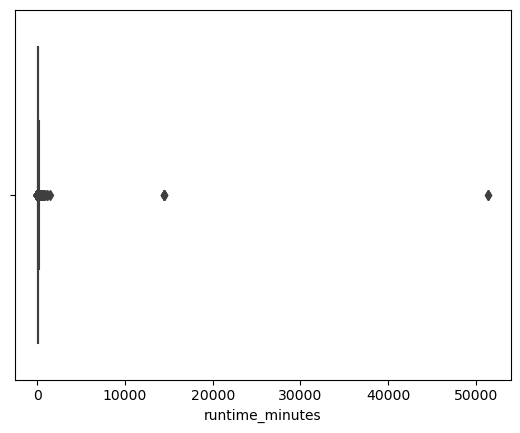

In [138]:
#Plotting boxplot to visualize the outliers
sns.boxplot(data = imdb, x = 'runtime_minutes', showfliers=True);

In [139]:
#Selecting the rows with the outliers
imdb.loc[(imdb.runtime_minutes > 200) | (imdb.runtime_minutes < 40)]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
143,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama,7.8,6,nm0104888,Carsten Brandt,"actor,director,writer"
1701,tt10243660,A Tale of Two Kitchens,A Tale of Two Kitchens,2019,29.0,Documentary,6.7,104,nm1970269,Trisha Ziff,"producer,director,writer"
1705,tt10244756,Ang hupa,Ang hupa,2019,276.0,Sci-Fi,7.2,5,nm0225010,Lav Diaz,"writer,director,editor"
2216,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,Biography,8.2,9372,nm0000217,Martin Scorsese,"producer,director,actor"
2216,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,Documentary,8.2,9372,nm0000217,Martin Scorsese,"producer,director,actor"
...,...,...,...,...,...,...,...,...,...,...,...
179676,tt9318514,Reason,Vivek,2018,261.0,Documentary,9.0,44,nm0666674,Anand Patwardhan,"director,editor,producer"
180302,tt9573980,Leaving Neverland,Leaving Neverland,2019,240.0,Documentary,7.1,19632,nm0715371,Dan Reed,"director,producer,writer"
180784,tt9749570,Heimat Is a Space in Time,Heimat ist ein Raum aus Zeit,2019,218.0,Documentary,7.8,14,nm0374656,Thomas Heise,"director,writer,producer"
181098,tt9865446,Siege,Siege,2019,16.0,Sci-Fi,8.5,32,nm10490240,Deeptanshu Sinha,"director,writer,art_department"


In [140]:
#Dropping outliers
imdb = imdb.loc[(imdb.runtime_minutes>=40) & (imdb.runtime_minutes<=200)]
imdb.shape

(137604, 11)

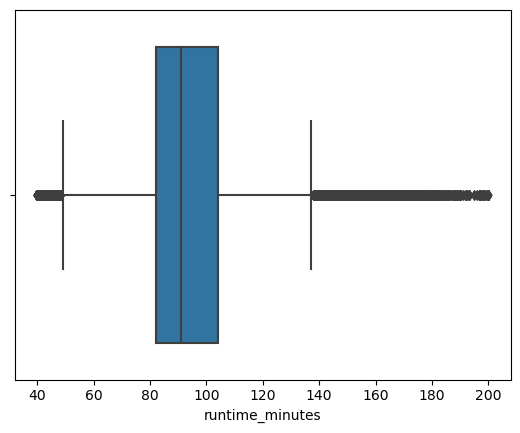

In [141]:
#Previewing boxplot again to visualize the outliers
sns.boxplot(data = imdb, x = 'runtime_minutes');

The boxplot shows that most movies are between 80 to 105 minutes long.

### 5.5 Wrong data types

**a. movie_budgets**

The word "minutes" is in the runtime column. I will remove it and convert to integers. 

In [142]:
#Removing minutes and converting to integer
movie_budgets['runtime'] = movie_budgets['runtime'].str.replace('minutes', '').astype(int)


In [143]:
movie_budgets['runtime']

0       104
0       104
0       104
0       104
1       104
       ... 
4679    108
4680    108
4680    108
4681    108
4681    108
Name: runtime, Length: 13523, dtype: int32

### 6.6. Merges

Movie_budgets and rt_reviews can be merged using the column id

In [144]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Action,104
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Adventure,104
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Classics,104
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Drama,104
1,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377",R,Action,104


In [145]:
rt_reviews.head()

,id,fresh,critic,top_critic,publisher,date
0,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
5,3,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"


In [146]:
#Merging the two dataframes
movie_budgets_merged = rt_reviews.merge(movie_budgets, how='inner', on='id')
movie_budgets_merged


,id,fresh,critic,top_critic,publisher,date,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",R,Drama,108
1,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",R,Science Fiction,108
2,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",R,Fantasy,108
3,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695",R,Drama,108
4,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695",R,Science Fiction,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464694,99,rotten,Robert Denerstein,1,Denver Rocky Mountain News,"December 23, 2002","May 9, 2008",Poultrygeist: Night of the Chicken Dead,"$450,000","$13,804","$22,623",PG-13,Romance,102
464695,99,rotten,Robert Denerstein,1,Denver Rocky Mountain News,"December 23, 2002","Feb 3, 2015",UnDivided,"$250,000",$0,$0,PG-13,Comedy,102
464696,99,rotten,Robert Denerstein,1,Denver Rocky Mountain News,"December 23, 2002","Feb 3, 2015",UnDivided,"$250,000",$0,$0,PG-13,Romance,102
464697,99,rotten,Robert Denerstein,1,Denver Rocky Mountain News,"December 23, 2002","Jul 7, 2015",Tiger Orange,"$100,000",$0,$0,PG-13,Comedy,102


# 6. Exploratory Data Analysis

This section will analyse the data and creating visualisations that answer the following business questions that will lead to appropriate recommendations:
1. What are the most popular genres?
2. What is the distribution of ratings among the movies?
3. Who are the best directors?
4. Which are the most successful studios?
5. What is the relationship between production budget and domestic/worldwide gross?

### 6.1. Most Popular Genres

**a. Using the genre column**

In [152]:
#Calculating frequency of each genre to determine which genres are the most popular.
genre_counts = movie_budgets_merged['genre'].value_counts()
genre_counts

Drama               104348
Comedy               78540
Romance              28562
 Suspense            26969
Mystery              26969
Action               24708
 Adventure           24708
Science Fiction      19314
 Fantasy             19314
Kids                 15486
 Family              15486
 Performing Arts     14033
Musical              14033
Art House            12165
 International       12165
Horror                8747
Sports                6840
 Fitness              6840
Classics              4023
Documentary            696
Special Interest       696
Television              57
Name: genre, dtype: int64

I will use the ggplot style

In [154]:
#Setting the style
plt.style.use('ggplot')

In [158]:
#Sorting the genre counts in ascending order
genre_counts_asc = genre_counts.sort_values(ascending=True)

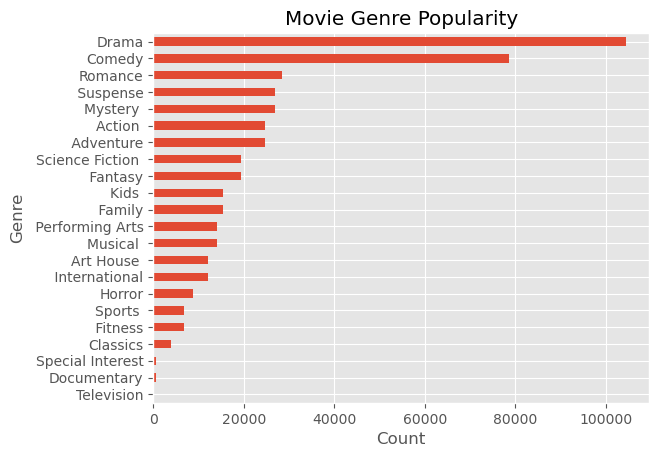

In [159]:
# Plotting a bar chart to visualize the top genre counts
genre_counts_asc.plot(kind='barh')
plt.title('Movie Genre Popularity')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()